### Таблица с чисткой, но без удаления не доставленных товаров

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df_56 = pd.read_csv('data_05_06.csv', sep=';', encoding='cp1251', decimal=',')
df_78 = pd.read_csv('data_07_08.csv', sep=';', encoding='cp1251', decimal=',')

In [3]:
df_56.head(2)

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.05.2017 0:03,03.05.2017 0:00,4513479_TR,Доставлен,761,761,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,49,2,1,30.04.2017 0:00,55574954-50515053535277,107117_ku13@mail.ru,Марина,ID10020734553,0,NaN
1,01.05.2017 10:18,03.05.2017 0:00,4513492_TR,К отгрузке,1 878,1 878,Pick point,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,180,1,1,30.04.2017 0:00,55574851-50484949535070,121117_yu21@yandex.ru,Гость,IDL00035982755,0,NaN


In [4]:
df_78.head(2)

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.07.2017 0:00,06.07.2017 0:00,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,3,1,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051334048,0,NaN
1,01.07.2017 0:00,06.07.2017 0:00,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,4,1,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051367351,0,NaN


In [16]:
df_b = df[((df['НовыйСтатус'] == 'Доставлен') & (df['МетодДоставки'] != 'Магазины'))]
df_b

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа


In [18]:
df_b = df[((df['Статус'] == 'Доставлен') & (df['МетодДоставки'] != 'Магазины'))]
df_b.shape

(365624, 38)

### Объединение датасетов

In [5]:
#df = pd.concat([df_56, df_78])
df = pd.concat([df_56, df_78]).drop_duplicates()

In [6]:
print(df_56.shape)
print(df_78.shape)
print(df.shape)
#print(df_dd.shape)

(730558, 38)
(797192, 38)
(1523057, 38)


### Преобразуем данные в некоторых колонках, с которыми будем работать дальше

In [7]:
# Убираем пробелы
df['СуммаДокумента'] = df['СуммаДокумента'].replace(r'\s+','',regex=True)
df['Цена'] = df['Цена'].replace(r'\s+','',regex=True)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].replace(r'\s+','',regex=True)

# Запятые на точки
df['СуммаДокумента'] = df['СуммаДокумента'].replace(',','.',regex=True)
df['Цена'] = df['Цена'].replace(',','.',regex=True)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].replace(',','.',regex=True)

# From object to float
df['СуммаДокумента'] = pd.to_numeric(df['СуммаДокумента'],errors = 'coerce')
df['Цена'] = pd.to_numeric(df['Цена'],errors = 'coerce')
df['ЦенаЗакупки'] = pd.to_numeric(df['ЦенаЗакупки'],errors = 'coerce')

### Чистим данные

In [9]:
df = df[(df['Количество'] > 0)] 
df = df[(df['Отменено'] != 'Да')]
df = df[(df['СуммаЗаказаНаСайте'] != 0) | (df['СуммаДокумента'] != 0)]
df = df[(df['КоличествоПроданоКлиенту'] > 0)]

In [10]:
df.shape

(1157676, 38)

### Убираем пустные значения в столбце "Регион", заменяя их на значения из столбца "Город магазина"

In [11]:
df['Регион'] = df['Регион'].fillna(df['ГородМагазина'])

In [12]:
# Удаляем товары без региона
df = df[(df['Регион'] != '0')]

In [13]:
df.loc[df['ГородМагазина'] == '0', 'ГородМагазина'] = 'ИнтернетДоставка'

### Доставка не может являться полноценным заказом: удалить все строки с "Доставка" в столбце "Номенклатура" и соответственно в столбцах "Группа2"

In [14]:
df_delivary = df[(df['Номенклатура'] == 'Доставка') | (df['Группа2'] == 'Доставка')]

In [15]:
df = df[(df['Номенклатура'] != 'Доставка')]
df = df[(df['Группа2'] != 'Доставка')]

### Проанализируем данные

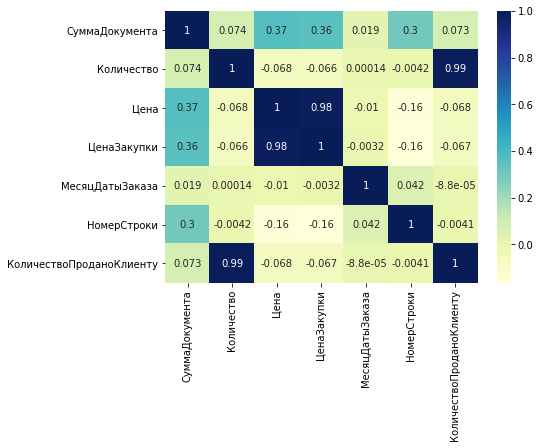

In [16]:
fig = plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu');

In [17]:
mass = df.agg(["nunique",
               (lambda x: x.nunique() / len(x) * 100),
               (lambda x: x.isin([0]).sum()), 
               (lambda x: x.isin([0]).sum() / len(x) * 100),
               (lambda x: x.isna().sum()), 
               (lambda x: x.isna().sum() / len(x) * 100),]).transpose()

mass.columns = ["Unique", "Percent unique", "Zeros", "Percent zeros", "NaNs", "Percent NaNs",] 
mass 

,Unique,Percent unique,Zeros,Percent zeros,NaNs,Percent NaNs
Дата,43081.0,4.742922,0.0,0.00000,0.0,0.000000
ДатаДоставки,169.0,0.018606,0.0,0.00000,0.0,0.000000
НомерЗаказаНаСайте,253004.0,27.853999,0.0,0.00000,0.0,0.000000
НовыйСтатус,14.0,0.001541,0.0,0.00000,0.0,0.000000
СуммаЗаказаНаСайте,17263.0,1.900537,0.0,0.00000,0.0,0.000000
СуммаДокумента,18276.0,2.012062,1.0,0.00011,0.0,0.000000
МетодДоставки,6.0,0.000661,0.0,0.00000,0.0,0.000000
ФормаОплаты,2.0,0.000220,0.0,0.00000,0.0,0.000000
Регион,599.0,0.065946,0.0,0.00000,0.0,0.000000
Группа2,13.0,0.001431,0.0,0.00000,0.0,0.000000


### Создадим новые столбцы с проверкой данных (сумм)

In [18]:
# СуммаЗаказаНаСайте = СуммаДокумента
df['Нов_СуммаЗаказаНаСайте'] = df['СуммаДокумента']

# СуммаСтроки = Цена * Количество
df['Нов_СуммаСтроки'] = df['Цена'] * df['Количество']

# Маржа = Нов_СуммаСтроки - ЦенаЗакупки
df['Нов_Маржа'] = df['Нов_СуммаСтроки'] - df['ЦенаЗакупки']

### Сохраним таблицу размещенных заказов.

In [19]:
df.to_csv('for_tables_filtered_data_Размещенные.csv', index=False, sep=';', encoding='utf-8-sig')

### One-hot-encoding

In [2]:
df = pd.read_csv('for_tables_filtered_data_Размещенные.csv', sep=';')

In [3]:
# Только выкупленные товары
df = df[(df['НовыйСтатус'] == 'Доставлен')]

# Телефон не '0'
df = df[(df['Телефон_new'] != '0')]

# Nan заменим на не сущесвующее значение, чтобы потом удалить все строки не с этим значением
df['ПричинаОтмены'] = df['ПричинаОтмены'].fillna(999999); 
df = df[(df['ПричинаОтмены'] == 999999)] 


df = df.dropna(subset = ['Группа2'])
df = df.dropna(subset = ['Группа3'])
df = df.dropna(subset = ['МетодДоставки'])
df = df.dropna(subset = ['ФормаОплаты'])

In [4]:
df.shape

(509067, 45)

In [5]:
phones_buyed = pd.read_csv('pivot_table_Phone_new_buyed.csv', sep=';') # 112595 rows × 11 columns
phones_all = pd.read_csv('pivot_table_Phone_new_all.csv', sep=';') # 163146 rows × 11 columns

In [6]:
# Телефон не '0'
phones_buyed = phones_buyed[(phones_buyed['Телефон_new'] != '0')]
phones_all = phones_all[(phones_all['Телефон_new'] != '0')]

phones_buyed.merge(phones_all, ...)

Сначала phones_buyed (выкупленные), потом phones_all (все / оформленные)

Выручка_x, ... (выкупленные)

Выручка_y, ... (все / оформленные)

In [7]:
vitrina = (phones_buyed.merge(phones_all, on = ['Телефон_new'], how='inner')) # 112595 rows × 21 columns

In [8]:
vitrina.columns = ['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed', 'Выручка_all',
       'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all', 'Средний чек_all',
       'Кол-во чеков_all', 'Кол-во товаров_all',
       'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
       'Ценность клиента_all']

In [9]:
# Витрина с основными показателями с выкупленными и размещенными товарами
vitrina.to_csv('vitrina_only_general_info.csv', index=False, sep=';') 

In [10]:
# sum the number of the items within a group 

def pr(x, tag): 
    return (np.array(x).reshape((-1)) == tag).sum()

### Группа2

In [11]:
df['Группа2'].unique()

array(['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ОБУВЬ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ЖЕНСКИЕ ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ ПИТАНИЕ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'], dtype=object)

In [12]:
len(df['Группа2'].unique())

13

In [13]:
items_Group2 = df.groupby(['Телефон_new']).agg({
    'Группа2': { 
        'КРУПНОГАБАРИТНЫЙ ТОВАР': lambda x: pr(x, 'КРУПНОГАБАРИТНЫЙ ТОВАР'), 
        'ТЕКСТИЛЬ, ТРИКОТАЖ': lambda x: pr(x, 'ТЕКСТИЛЬ, ТРИКОТАЖ'), 
        'ОБУВЬ': lambda x: pr(x, 'ОБУВЬ'), 
        'КАНЦТОВАРЫ, КНИГИ, ДИСКИ': lambda x: pr(x, 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ'), 
        'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ': lambda x: pr(x, 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'), 
        'ИГРУШКИ': lambda x: pr(x, 'ИГРУШКИ'), 
        'КОСМЕТИКА/ГИГИЕНА': lambda x: pr(x, 'КОСМЕТИКА/ГИГИЕНА'), 
        'СОПУТСТВУЮЩИЕ ТОВАРЫ': lambda x: pr(x, 'СОПУТСТВУЮЩИЕ ТОВАРЫ'), 
        'ЖЕНСКИЕ ШТУЧКИ': lambda x: pr(x, 'ЖЕНСКИЕ ШТУЧКИ'), 
        'ПОДГУЗНИКИ': lambda x: pr(x, 'ПОДГУЗНИКИ'), 
        'ДЕТСКОЕ ПИТАНИЕ': lambda x: pr(x, 'ИДЕТСКОЕ ПИТАНИЕ'), 
        'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА': lambda x: pr(x, 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'), 
        'ТОВАРЫ ДЛЯ ЖИВОТНЫХ': lambda x: pr(x, 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'),
    } 
}) 

items_Group2.columns = items_Group2.columns.get_level_values(1) 
items_Group2 = items_Group2.groupby(level = 0).agg('sum');

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [14]:
items_Group2.shape

(112594, 13)

In [96]:
items_Group2.to_csv('items_Group2.csv', index=False, sep=';') 

### МетодДоставки НЕТ

In [15]:
df['МетодДоставки'].unique()

array(['Магазины'], dtype=object)

In [42]:
len(df['МетодДоставки'].unique())

1

In [ ]:
items_delivery = df.groupby(['Телефон_new']).agg({
    'МетодДоставки': { 
        'Магазины': lambda x: pr(x, 'Магазины'),
    } 
}) 

items_delivery.columns = items_delivery.columns.get_level_values(1) 
items_delivery = items_delivery.groupby(level = 0).agg('sum') 

### ФормаОплаты НЕТ

In [16]:
df['ФормаОплаты'].unique()

array(['Безналичная'], dtype=object)

In [44]:
len(df['ФормаОплаты'].unique())

1

In [ ]:
items_payment = df.groupby(['Телефон_new']).agg({
    'ФормаОплаты': { 
        'Безналичная': lambda x: pr(x, 'Безналичная'),
    } 
}) 

items_payment.columns = items_payment.columns.get_level_values(1) 
items_payment = items_payment.groupby(level = 0).agg('sum') 

### Гео
- ГородМагазина -- 64 уникальных значений (возьмем топ-5 + "другое")
- МагазинЗаказа -- 89 уникальных значений (номер магазина, не город)
- Гео -- 'Москва', 'МО', 'Регионы'  (мало ункиальных значений - 3)

#### Добавляем 'ГородМагазина', но так как их очень много (64), то берем с самой большой выручкой как отдельные, а остальные объеденяем как "Другое".

In [28]:
df['ГородМагазина'].value_counts()

ИнтернетДоставка    503699
Калуга                 469
Москва                 437
Ростов-на-Дону         314
Саратов                311
                     ...  
Балаково                19
Улан-Удэ                17
Казань                  17
Реутов                  11
Стерлитамак             11
Name: ГородМагазина, Length: 64, dtype: int64

In [31]:
arr_CityShop = df['ГородМагазина'].unique()

for reg in arr_CityShop:
    if (reg != 'ИнтернетДоставка' and reg != 'Калуга' and reg != 'Москва' and 
        reg != 'Ростов-на-Дону' and reg != 'Саратов'): 
        
        df.loc[df['ГородМагазина'] == reg, 'ГородМагазина'] = 'Другой'

In [32]:
df['ГородМагазина'].unique()

array(['ИнтернетДоставка', 'Другой', 'Ростов-на-Дону', 'Москва',
       'Саратов', 'Калуга'], dtype=object)

In [36]:
items_CityShop = df.groupby(['Телефон_new']).agg({
    'ГородМагазина': { 
        'ИнтернетДоставка': lambda x: pr(x, 'ИнтернетДоставка'), 
        'Калуга': lambda x: pr(x, 'Калуга'), 
        'Москва': lambda x: pr(x, 'Москва'), 
        'Ростов-на-Дону': lambda x: pr(x, 'Ростов-на-Дону'), 
        'Саратов': lambda x: pr(x, 'Саратов'), 
        'Другой': lambda x: pr(x, 'Другой'), 
    } 
})

items_CityShop.columns = items_CityShop.columns.get_level_values(1) 
items_CityShop = items_CityShop.groupby(level = 0).agg('sum') 

In [37]:
items_CityShop.shape

(112594, 6)

In [ ]:
items_CityShop.to_csv('items_CityShop.csv', index=False, sep=';') 

### Final merge

In [ ]:
items_Group2
#items_delivery
#items_payment
items_CityShop

In [40]:
vitrina_Group2  = (vitrina.merge(
    items_Group2, on = ['Телефон_new'], how='inner'))

#vitrina_Group2_delivery = (vitrina_Group2.merge(
#    items_delivery, on = ['Телефон_new'], how='inner'))
#
#vitrina_Group2_delivery_payment = (vitrina_Group2_delivery.merge(
#    items_payment, on = ['Телефон_new'], how='inner'))

vitrina_Group2_region = (vitrina_Group2.merge(
    items_CityShop, on = ['Телефон_new'], how='inner'))

In [41]:
vitrina_Group2_region.shape 

(112594, 40)

In [43]:
vitrina_Group2_region = vitrina_Group2_region[(vitrina_Group2_region['Телефон_new'] != '0')] 

In [45]:
vitrina_Group2_region.to_csv('vitrina_Group2_region.csv', index=False, sep=';')

# --------------------------------------------------------------------------------------

### По процентам / долям

In [46]:
vitrina_Group2_region = pd.read_csv('vitrina_Group2_region.csv', sep=';') 

In [47]:
vitrina1 = vitrina_Group2_region.copy() 

In [48]:
df.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа', 'Нов_СуммаЗаказаНаСайте',
       'Нов_СуммаСтроки', 'Нов_Маржа', 'Дата_дата', 'ДеньНеделиЦифра',
       'ДеньНедели', 'ВремяОкругл'],
      dtype='object')

In [53]:
df['ГородМагазина'].unique()

array(['ИнтернетДоставка', 'Другой', 'Ростов-на-Дону', 'Москва',
       'Саратов', 'Калуга'], dtype=object)

In [54]:
vitrina1['sum_Group2'] = vitrina1.loc[:, 'КРУПНОГАБАРИТНЫЙ ТОВАР':'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'].sum(axis=1)
#vitrina1['sum_DeliveryType'] = vitrina1.loc[:, 'Самовывоз':'Курьерская'].sum(axis=1)s
#vitrina1['sum_PaymentType'] = vitrina1.loc[:, 'КартойПриПолучении':'Банк Тинькофф'].sum(axis=1)
vitrina1['sum_Region'] = vitrina1.loc[:, 'ИнтернетДоставка':'Калуга'].sum(axis=1)

In [56]:
col_Group2 = ['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ОБУВЬ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ЖЕНСКИЕ ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ ПИТАНИЕ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ']

#col_DeliveryType = ['Самовывоз', 'Курьерская']
#
#col_PaymentType = ['КартойПриПолучении', 'Наличные', 'PayPal', 'Квитанция Сбербанка',
#                   'RBK Money', 'Кредит в магазине','Банк Тинькофф']

col_Region = ['ИнтернетДоставка', 'Другой', 'Ростов-на-Дону', 'Москва', 'Саратов', 'Калуга']

In [57]:
for col in col_Group2: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_Group2']

#for col in col_DeliveryType: 
#    vitrina1[col] = vitrina1[col]/vitrina1['sum_DeliveryType']
#
#for col in col_PaymentType: 
#    vitrina1[col] = vitrina1[col]/vitrina1['sum_PaymentType']

for col in col_Region: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_Region']

In [58]:
del vitrina1['sum_Group2']
#del vitrina1['sum_DeliveryType']
#del vitrina1['sum_PaymentType']
del vitrina1['sum_Region']

In [62]:
vitrina1.to_csv('vitrina_final.csv', index=False, sep=';') 

In [65]:
vitrina1.columns

Index(['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all',
       'Средний чек_all', 'Кол-во чеков_all', 'Кол-во товаров_all',
       'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
       'Ценность клиента_all', 'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ',
       'ОБУВЬ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ЖЕНСКИЕ ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ ПИТАНИЕ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ИнтернетДоставка', 'Калуга', 'Москва',
       'Ростов-на-Дону', 'Саратов', 'Другой'],
      dtype='object')